In [1]:
#import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import seaborn as sns

In [2]:
#read in the IRS data
data = pd.read_csv('2015_zip.csv')
data.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,1,836320,481570,109790,233260,455560,1356760,...,373410,328469,0,0,0,0,61920,48150,732670,1933120
1,1,AL,0,2,494830,206630,146250,129390,275920,1010990,...,395880,965011,0,0,0,0,73720,107304,415410,1187403
2,1,AL,0,3,261250,80720,139280,36130,155100,583910,...,251490,1333418,0,0,0,0,64200,139598,193030,536699
3,1,AL,0,4,166690,28510,124650,10630,99950,423990,...,165320,1414283,0,0,0,0,45460,128823,116440,377177
4,1,AL,0,5,212660,19520,184320,4830,126860,589490,...,212000,3820152,420,168,60,31,83330,421004,121570,483682


# Census Education Data

In [3]:
#read in census education data
cen = pd.read_csv('census_ed_2015.csv')
cen.head()

C:\Users\michayoung\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,8,12,64,68,72,184,188,192,220,224,228,256,260,264,292,296,300,616,620,624) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC02,HC01_MOE_VC02,HC02_EST_VC02,HC02_MOE_VC02,HC03_EST_VC02,HC03_MOE_VC02,HC04_EST_VC02,...,HC02_EST_VC85,HC02_MOE_VC85,HC03_EST_VC85,HC03_MOE_VC85,HC04_EST_VC85,HC04_MOE_VC85,HC05_EST_VC85,HC05_MOE_VC85,HC06_EST_VC85,HC06_MOE_VC85
0,8600000US00601,601,ZCTA5 00601,1846,72,(X),(X),955,66,(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,8600000US00602,602,ZCTA5 00602,4051,78,(X),(X),2066,26,(X),...,(X),(X),29250,10024,(X),(X),23987,1731,(X),(X)
2,8600000US00603,603,ZCTA5 00603,5119,180,(X),(X),2627,116,(X),...,(X),(X),46618,10825,(X),(X),27486,4471,(X),(X)
3,8600000US00606,606,ZCTA5 00606,652,50,(X),(X),348,23,(X),...,(X),(X),-,**,(X),(X),-,**,(X),(X)
4,8600000US00610,610,ZCTA5 00610,2840,82,(X),(X),1479,27,(X),...,(X),(X),65048,54647,(X),(X),28906,7804,(X),(X)


In [4]:
#extract meaningful columns from census data
edu = cen[['GEO.display-label','HC01_EST_VC02','HC01_EST_VC03','HC01_EST_VC04','HC01_EST_VC05'
          ,'HC01_EST_VC06','HC01_EST_VC08','HC01_EST_VC09','HC01_EST_VC10','HC01_EST_VC11',
          'HC01_EST_VC12','HC01_EST_VC13','HC01_EST_VC14','HC01_EST_VC15']].copy()
edu.head()

,GEO.display-label,HC01_EST_VC02,HC01_EST_VC03,HC01_EST_VC04,HC01_EST_VC05,HC01_EST_VC06,HC01_EST_VC08,HC01_EST_VC09,HC01_EST_VC10,HC01_EST_VC11,HC01_EST_VC12,HC01_EST_VC13,HC01_EST_VC14,HC01_EST_VC15
0,ZCTA5 00601,1846,318,352,1060,116,11881,2992,1423,3173,1586,615,1720,372
1,ZCTA5 00602,4051,590,726,2284,451,27575,6988,3067,5774,2338,3499,4203,1706
2,ZCTA5 00603,5119,1132,1421,2080,486,35946,7110,3812,9690,3933,3147,5981,2273
3,ZCTA5 00606,652,118,283,187,64,4249,1362,529,1515,233,155,385,70
4,ZCTA5 00610,2840,478,896,1333,133,19249,4312,1959,6510,1969,1598,2266,635


In [5]:
#remove text from zipcode and change to numeric
edu['zipcode'] = edu['GEO.display-label'].map(lambda x: x.lstrip('ZCTA5 '))
edu['zipcode'] = pd.to_numeric(edu['zipcode'],errors='coerce')
edu.dtypes

GEO.display-label    object
HC01_EST_VC02         int64
HC01_EST_VC03         int64
HC01_EST_VC04         int64
HC01_EST_VC05         int64
HC01_EST_VC06         int64
HC01_EST_VC08         int64
HC01_EST_VC09         int64
HC01_EST_VC10         int64
HC01_EST_VC11         int64
HC01_EST_VC12         int64
HC01_EST_VC13         int64
HC01_EST_VC14         int64
HC01_EST_VC15         int64
zipcode               int64
dtype: object

In [6]:
#create new percentage columns for edu
edu['no_high_school'] = (edu['HC01_EST_VC03']+edu['HC01_EST_VC09']+edu['HC01_EST_VC10'])/(edu['HC01_EST_VC02']+edu['HC01_EST_VC08'])
edu['high_school'] = (edu['HC01_EST_VC04']+edu['HC01_EST_VC11'])/(edu['HC01_EST_VC02']+edu['HC01_EST_VC08'])
edu['associates'] = (edu['HC01_EST_VC05']+edu['HC01_EST_VC12']+edu['HC01_EST_VC13'])/(edu['HC01_EST_VC02']+edu['HC01_EST_VC08'])
edu['college'] = (edu['HC01_EST_VC06']+edu['HC01_EST_VC14'])/(edu['HC01_EST_VC02']+edu['HC01_EST_VC08'])
edu['grad'] = edu['HC01_EST_VC15']/edu['HC01_EST_VC08']

In [7]:
#check for null values and replace with 0
edu.isnull().sum()
edu.fillna(0,inplace=True)

In [8]:
#select relevant columns
edu = edu.loc[:,'zipcode':'grad'].copy()

In [9]:
edu.head()

,zipcode,no_high_school,high_school,associates,college,grad
0,601,0.344795,0.256793,0.237561,0.133751,0.031310
1,602,0.336590,0.205527,0.256782,0.147157,0.061868
2,603,0.293535,0.270571,0.223061,0.157482,0.063234
3,606,0.409916,0.366864,0.117323,0.091614,0.016474
4,610,0.305537,0.335280,0.221830,0.108606,0.032989


# Census Occupation Data

In [10]:
#read in census occupation data
cen1 = pd.read_csv('census_occ_2015.csv')
cen1.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC01_EST_VC36,HC01_MOE_VC36,HC02_EST_VC36,HC02_MOE_VC36,HC03_EST_VC36,HC03_MOE_VC36,HC04_EST_VC36,HC04_MOE_VC36,HC05_EST_VC36,HC05_MOE_VC36
0,8600000US00601,601,ZCTA5 00601,2592,302,1571,200,60.6,4.4,1021,...,64,54,64,54,100,41.1,0,21,0,41.1
1,8600000US00602,602,ZCTA5 00602,6644,498,3635,369,54.7,3.6,3009,...,142,70,109,63,76.8,23.6,33,36,23.2,23.6
2,8600000US00603,603,ZCTA5 00603,8238,607,4620,395,56.1,2.9,3618,...,287,122,220,111,76.7,18,67,55,23.3,18
3,8600000US00606,606,ZCTA5 00606,745,190,398,116,53.4,11.4,347,...,16,25,16,25,100,82.2,0,19,0,82.3
4,8600000US00610,610,ZCTA5 00610,5336,438,2834,303,53.1,3.5,2502,...,69,54,43,47,62.3,43.9,26,29,37.7,43.9


In [11]:
#extract meaningful columns from census data
occ = cen1[['GEO.display-label','HC01_EST_VC01','HC01_EST_VC03','HC01_EST_VC06','HC01_EST_VC10',
            'HC01_EST_VC12','HC01_EST_VC15','HC01_EST_VC18','HC01_EST_VC26','HC01_EST_VC29','HC01_EST_VC33']].copy()
occ.head()

,GEO.display-label,HC01_EST_VC01,HC01_EST_VC03,HC01_EST_VC06,HC01_EST_VC10,HC01_EST_VC12,HC01_EST_VC15,HC01_EST_VC18,HC01_EST_VC26,HC01_EST_VC29,HC01_EST_VC33
0,ZCTA5 00601,2592,247,75,335,21,275,466,487,339,368
1,ZCTA5 00602,6644,748,183,1025,40,494,1080,1658,594,862
2,ZCTA5 00603,8238,1206,407,1014,46,492,1441,2161,706,811
3,ZCTA5 00606,745,41,9,55,0,70,181,117,72,200
4,ZCTA5 00610,5336,298,171,757,0,152,779,1234,480,1465


In [12]:
#remove text from zipcode and change to numeric
occ['zipcode'] = occ['GEO.display-label'].map(lambda x: x.lstrip('ZCTA5 '))
occ['zipcode'] = pd.to_numeric(occ['zipcode'],errors='coerce')
occ.dtypes

GEO.display-label    object
HC01_EST_VC01         int64
HC01_EST_VC03         int64
HC01_EST_VC06         int64
HC01_EST_VC10         int64
HC01_EST_VC12         int64
HC01_EST_VC15         int64
HC01_EST_VC18         int64
HC01_EST_VC26         int64
HC01_EST_VC29         int64
HC01_EST_VC33         int64
zipcode               int64
dtype: object

In [13]:
#create new percentage columns for occ
occ['business'] = occ['HC01_EST_VC03']/occ['HC01_EST_VC01']
occ['stem'] = occ['HC01_EST_VC06']/occ['HC01_EST_VC01']
occ['ed_arts'] = (occ['HC01_EST_VC10']-occ['HC01_EST_VC12'])/occ['HC01_EST_VC01']
occ['legal'] = occ['HC01_EST_VC12']/occ['HC01_EST_VC01']
occ['healthcare'] = occ['HC01_EST_VC15']/occ['HC01_EST_VC01']
occ['service'] = occ['HC01_EST_VC18']/occ['HC01_EST_VC01']
occ['sales'] = occ['HC01_EST_VC26']/occ['HC01_EST_VC01']
occ['cons_maint'] = occ['HC01_EST_VC29']/occ['HC01_EST_VC01']
occ['prod_trans'] = occ['HC01_EST_VC33']/occ['HC01_EST_VC01']

In [14]:
#check for null values and replace with 0
occ.isnull().sum()
occ.fillna(0,inplace=True)

In [15]:
#select relevant columns
occ = occ.loc[:,'zipcode':'prod_trans'].copy()

In [16]:
occ.head()

,zipcode,business,stem,ed_arts,legal,healthcare,service,sales,cons_maint,prod_trans
0,601,0.095293,0.028935,0.121142,0.008102,0.106096,0.179784,0.187886,0.130787,0.141975
1,602,0.112583,0.027544,0.148254,0.006020,0.074353,0.162553,0.249548,0.089404,0.129741
2,603,0.146395,0.049405,0.117504,0.005584,0.059723,0.174921,0.262321,0.085700,0.098446
3,606,0.055034,0.012081,0.073826,0.000000,0.093960,0.242953,0.157047,0.096644,0.268456
4,610,0.055847,0.032046,0.141867,0.000000,0.028486,0.145990,0.231259,0.089955,0.274550


# IRS EDA

In [19]:
data.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,1,836320,481570,109790,233260,455560,1356760,...,373410,328469,0,0,0,0,61920,48150,732670,1933120
1,1,AL,0,2,494830,206630,146250,129390,275920,1010990,...,395880,965011,0,0,0,0,73720,107304,415410,1187403
2,1,AL,0,3,261250,80720,139280,36130,155100,583910,...,251490,1333418,0,0,0,0,64200,139598,193030,536699
3,1,AL,0,4,166690,28510,124650,10630,99950,423990,...,165320,1414283,0,0,0,0,45460,128823,116440,377177
4,1,AL,0,5,212660,19520,184320,4830,126860,589490,...,212000,3820152,420,168,60,31,83330,421004,121570,483682


In [20]:
data.columns

Index(['STATEFIPS', 'STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2',
       'MARS4', 'PREP', 'N2',
       ...
       'N10300', 'A10300', 'N85530', 'A85530', 'N85300', 'A85300', 'N11901',
       'A11901', 'N11902', 'A11902'],
      dtype='object', length=131)

In [21]:
data.shape

(166698, 131)

In [22]:
data.dtypes

STATEFIPS      int64
STATE         object
zipcode        int64
agi_stub       int64
N1             int64
mars1          int64
MARS2          int64
MARS4          int64
PREP           int64
N2             int64
NUMDEP         int64
TOTAL_VITA     int64
VITA           int64
TCE            int64
VITA_EIC       int64
RAL            int64
RAC            int64
ELDERLY        int64
A00100         int64
N02650         int64
A02650         int64
N00200         int64
A00200         int64
N00300         int64
A00300         int64
N00600         int64
A00600         int64
N00650         int64
A00650         int64
N00700         int64
               ...  
N85770         int64
A85770         int64
N85775         int64
A85775         int64
N09750         int64
A09750         int64
N10600         int64
A10600         int64
N59660         int64
A59660         int64
N59720         int64
A59720         int64
N11070         int64
A11070         int64
N10960         int64
A10960         int64
N11560       

In [23]:
data.describe()

,STATEFIPS,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,NUMDEP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
count,166698.000000,166698.000000,166698.00000,1.666980e+05,1.666980e+05,1.666980e+05,1.666980e+05,1.666980e+05,1.666980e+05,1.666980e+05,...,1.666980e+05,1.666980e+05,166698.000000,1.666980e+05,166698.000000,1.666980e+05,166698.000000,1.666980e+05,1.666980e+05,1.666980e+05
mean,29.663175,48877.636432,3.50000,1.763123e+03,8.277775e+02,6.397639e+02,2.614748e+02,9.449553e+02,3.432536e+03,1.141082e+03,...,1.341390e+03,1.802746e+04,40.471931,8.840840e+01,44.055298,2.209561e+02,343.341852,1.844871e+03,1.336259e+03,4.051610e+03
std,15.114210,27146.337114,1.70783,3.688917e+04,2.146043e+04,1.157044e+04,6.884743e+03,2.014062e+04,6.676873e+04,2.333503e+04,...,2.543139e+04,5.690578e+05,2046.048315,5.011014e+03,2234.538946,1.316226e+04,6442.483188,5.785610e+04,2.950743e+04,8.086236e+04
min,1.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,18.000000,27040.000000,2.00000,6.000000e+01,0.000000e+00,4.000000e+01,0.000000e+00,4.000000e+01,1.400000e+02,4.000000e+01,...,6.000000e+01,2.870000e+02,0.000000,0.000000e+00,0.000000,0.000000e+00,20.000000,1.600000e+01,4.000000e+01,1.330000e+02
50%,29.000000,48879.000000,3.50000,2.400000e+02,6.000000e+01,1.100000e+02,2.000000e+01,1.400000e+02,5.100000e+02,1.500000e+02,...,2.000000e+02,1.321000e+03,0.000000,0.000000e+00,0.000000,0.000000e+00,50.000000,1.440000e+02,1.600000e+02,5.280000e+02
75%,42.000000,70607.000000,5.00000,9.800000e+02,3.200000e+02,3.900000e+02,9.000000e+01,5.400000e+02,2.000000e+03,5.900000e+02,...,8.200000e+02,5.442750e+03,0.000000,0.000000e+00,0.000000,0.000000e+00,210.000000,6.310000e+02,6.800000e+02,2.130000e+03
max,56.000000,99999.000000,6.00000,6.231480e+06,4.287540e+06,1.677080e+06,1.050320e+06,3.686500e+06,9.566490e+06,3.544030e+06,...,3.259360e+06,1.415888e+08,576930.000000,1.382830e+06,629380.000000,3.524250e+06,843070.000000,1.557123e+07,4.969760e+06,1.016259e+07


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166698 entries, 0 to 166697
Columns: 131 entries, STATEFIPS to A11902
dtypes: int64(130), object(1)
memory usage: 166.6+ MB


In [17]:
#find rows where the number of returns is 0 and drop these rows
data[data['N1']==0].count()
data.drop(data[data.N1 == 0].index, inplace=True)

In [18]:
#create refund column, this will be the y variable
data['refund'] = data['A11902']/data['N11902']

In [19]:
#create percentage columns
df = data.copy()
df['single'] = df['mars1']/df['N1']
df['joint'] = df['MARS2']/df['N1']
df['head_house'] = df['MARS4']/df['N1']
df['prep'] = df['PREP']/df['N1']
df['exemptions'] = df['N2']/df['N1']
df['vita'] = df['TOTAL_VITA']/df['N1']
df['elderly'] = df['ELDERLY']/df['N1']
df['agi_avg'] = df['A00100']/df['N1']
df['total_avg'] = df['A02650']/df['N02650']
df['sal_avg'] = df['A00200']/df['N00200']
df['int_avg'] = df['A00300']/df['N00300']
df['div_avg'] = df['A00600']/df['N00600']
df['qual_div_avg'] = df['A00650']/df['N00650']
df['state_refund'] = df['A00700']/df['N00700']
df['business_income'] = df['A00900']/df['N00900']
df['cap_gain'] = df['A01000']/df['N01000']
df['ret_dist'] = df['A01400']/df['N01400']
df['pensions'] = df['A01700']/df['N01700']
df['unemployment'] = df['A02300']/df['N02300']
df['soc_sec'] = df['A02500']/df['N02500']
df['partnership'] = df['A26270']/df['N26270']
df['stat_adj'] = df['A02900']/df['N02900']
df['educator'] = df['A03220']/df['N03220']
df['self_retire'] = df['A03300']/df['N03300']
df['self_health'] = df['A03270']/df['N03270']
df['ira'] = df['A03150']/df['N03150']
df['stud_loan'] = df['A03210']/df['N03210']
df['tuition'] = df['A03230']/df['N03230']
df['dom_prod'] = df['A03240']/df['N03240']
df['item_ded'] = df['A04470']/df['N04470']
df['state_tax'] =df['A18425']/df['N18425']
df['state_sales_tax'] = df['A18450']/df['N18450']
df['real_estate'] = df['A18500']/df['N18500']
df['taxes_paid'] = df['A18300']/df['N18300']
df['mortgage'] = df['A19300']/df['N19300']
df['contributions'] = df['A19700']/df['N19700']
df['taxable_inc'] = df['A04800']/df['N04800']
df['tax_before_cred'] = df['A05800']/df['N05800']
df['alt_min'] = df['A09600']/df['N09600']
df['excess_prem'] = df['A05780']/df['N05780']
df['tax_cred'] = df['A07100']/df['N07100']
df['for_tax'] = df['A07300']/df['N07300']
df['child_cred'] = df['A07180']/df['N07180']
df['non_ref_ed'] = df['A07230']/df['N07230']
df['ret_cont'] = df['A07240']/df['N07240']
df['child_tax'] = df['A07220']/df['N07220']
df['energy_cred'] = df['A07260']/df['N07260']
df['self_emp_tax'] = df['A09400']/df['N09400']
df['prem_cred'] = df['A85770']/df['N85770']
df['adv_prem_cred'] = df['A85775']/df['N85775']
df['ind_health_pay'] = df['A09750']/df['N09750']
df['tot_tax_pay'] = df['A10600']/df['N10600']
df['eic'] = df['A59660']/df['N59660'] 
df['exc_eic'] = df['A59720']/df['N59720']
df['add_child_cred'] = df['A11070']/df['N11070']
df['ref_ed_cred'] = df['A10960']/df['N10960']
df['net_prem_cred'] = df['A11560']/df['N11560']
df['inc_tax'] = df['A06500']/df['N06500']
df['tax_liab'] = df['A10300']/df['N10300']
df['medicare'] = df['A85530']/df['N85530']
df['inv_tax'] = df['A85300']/df['N85300']
df['tax_due'] = df['A11901']/df['N11901']

In [20]:
#check for null values and replace with zero
df.isnull().sum()
df.fillna(0,inplace=True)

In [21]:
#combine with census data
df_merged = pd.merge(df,edu, how ='inner', on='zipcode')
df_merged = pd.merge(df_merged,occ, how='inner', on='zipcode')
df_merged.head()
df_merged.columns

Index(['STATEFIPS', 'STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2',
       'MARS4', 'PREP', 'N2',
       ...
       'grad', 'business', 'stem', 'ed_arts', 'legal', 'healthcare', 'service',
       'sales', 'cons_maint', 'prod_trans'],
      dtype='object', length=208)

In [22]:
#turn agi_stub from numeric into str
df_merged['agi_stub'] = df_merged['agi_stub'].astype(str)
df_merged.dtypes

STATEFIPS           int64
STATE              object
zipcode             int64
agi_stub           object
N1                  int64
mars1               int64
MARS2               int64
MARS4               int64
PREP                int64
N2                  int64
NUMDEP              int64
TOTAL_VITA          int64
VITA                int64
TCE                 int64
VITA_EIC            int64
RAL                 int64
RAC                 int64
ELDERLY             int64
A00100              int64
N02650              int64
A02650              int64
N00200              int64
A00200              int64
N00300              int64
A00300              int64
N00600              int64
A00600              int64
N00650              int64
A00650              int64
N00700              int64
                   ...   
energy_cred       float64
self_emp_tax      float64
prem_cred         float64
adv_prem_cred     float64
ind_health_pay    float64
tot_tax_pay       float64
eic               float64
exc_eic     

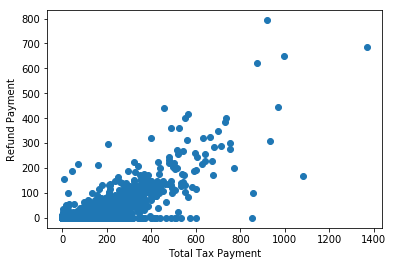

In [31]:
#total tax paid vs. refund
plt.scatter(df['tot_tax_pay'],df['refund'])
plt.xlabel('Total Tax Payment')
plt.ylabel('Refund Payment')
plt.show()

# Create X and y datasets

In [23]:
#create X dataset
X = df_merged.copy()
X.drop(['STATEFIPS','STATE','zipcode','refund','A11902','N11902'],axis=1,inplace=True)

In [24]:
#create dummies for agi_stub
X = pd.get_dummies(X)

In [25]:
#select relevant columns of X
X = X.loc[:,'single':'agi_stub_6']
X.columns

Index(['single', 'joint', 'head_house', 'prep', 'exemptions', 'vita',
       'elderly', 'agi_avg', 'total_avg', 'sal_avg', 'int_avg', 'div_avg',
       'qual_div_avg', 'state_refund', 'business_income', 'cap_gain',
       'ret_dist', 'pensions', 'unemployment', 'soc_sec', 'partnership',
       'stat_adj', 'educator', 'self_retire', 'self_health', 'ira',
       'stud_loan', 'tuition', 'dom_prod', 'item_ded', 'state_tax',
       'state_sales_tax', 'real_estate', 'taxes_paid', 'mortgage',
       'contributions', 'taxable_inc', 'tax_before_cred', 'alt_min',
       'excess_prem', 'tax_cred', 'for_tax', 'child_cred', 'non_ref_ed',
       'ret_cont', 'child_tax', 'energy_cred', 'self_emp_tax', 'prem_cred',
       'adv_prem_cred', 'ind_health_pay', 'tot_tax_pay', 'eic', 'exc_eic',
       'add_child_cred', 'ref_ed_cred', 'net_prem_cred', 'inc_tax', 'tax_liab',
       'medicare', 'inv_tax', 'tax_due', 'no_high_school', 'high_school',
       'associates', 'college', 'grad', 'business', 'stem', 'e

In [26]:
#normalize X dataset
X_norm = preprocessing.normalize(X)
X_norm = pd.DataFrame(X_norm,columns=X.columns)

In [27]:
#create y dataset
y= df_merged['refund']

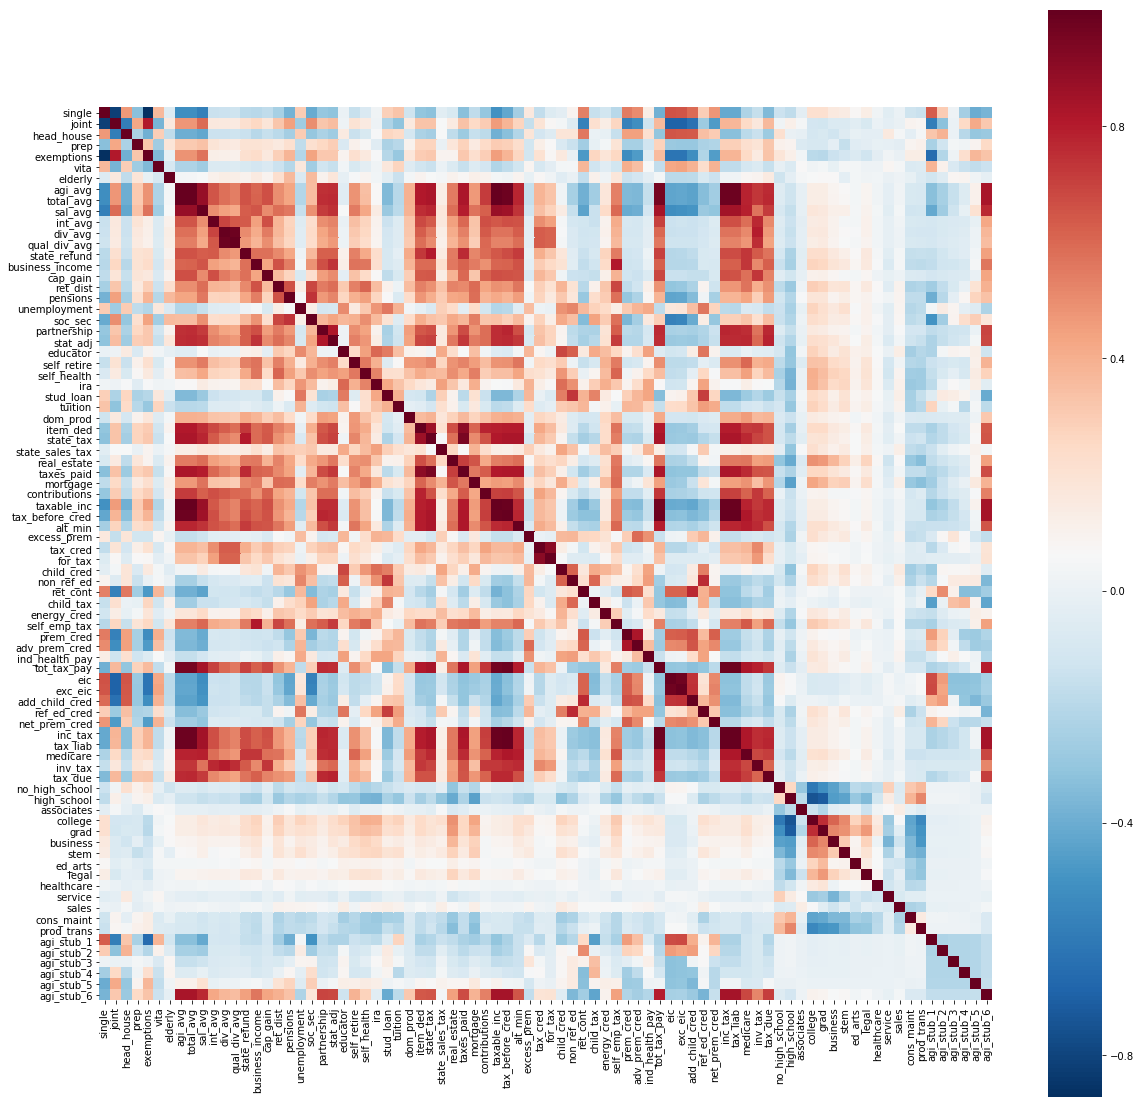

In [38]:
#heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr(),square=True,cmap='RdBu_r')
plt.show()

# Linear Regression

In [27]:
#instantiate linear model
reg = linear_model.LinearRegression()

In [29]:
#cross val score, try 3 cv
np.mean(cross_val_score(reg, X_norm, y, cv=3, scoring='neg_mean_squared_error'))

-43.731586628506456

In [29]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y,test_size = 0.3, random_state=52)

In [31]:
#instantiate linear model
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

print('Training accuracy:', reg_all.score(X_train, y_train))
print('Test accuracy:', reg_all.score(X_test, y_test))

Training accuracy: 0.32226488044833973
Test accuracy: 0.3328153824359442


# Lasso & Ridge Regression

In [32]:
#Ridge Regression
rr = linear_model.Ridge()
rr.fit(X_train,y_train)
print('Training accuracy:', rr.score(X_train, y_train))
print('Test accuracy:', rr.score(X_test, y_test))

Training accuracy: 0.2245615202460055
Test accuracy: 0.2352726095770962


In [33]:
#Lasso Regression
lr = linear_model.Lasso()
lr.fit(X_train,y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

Training accuracy: 0.0
Test accuracy: -3.565657215043316e-06


# Random Forest

In [30]:
#Random Forest
rf = RandomForestRegressor(n_estimators = 100,n_jobs=-1, random_state=9)
rf.fit(X_train, y_train)
#r2
#look at MSE
print('Training score:', rf.score(X_train, y_train))
print('Test score:', rf.score(X_test, y_test))

Training score: 0.9656854263943453
Test score: 0.7393415769723026


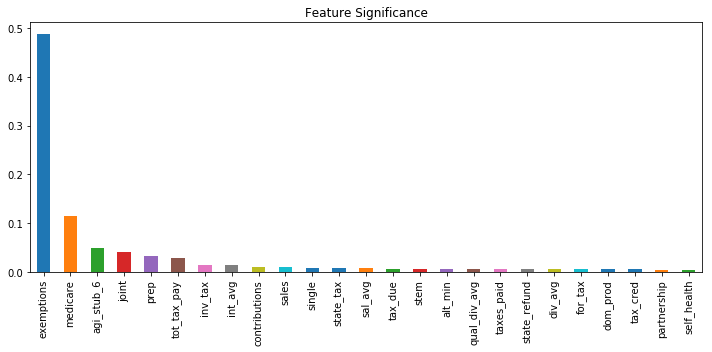

In [31]:
# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

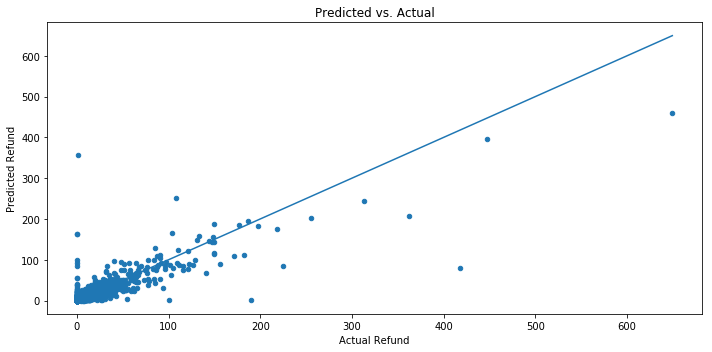

In [47]:
#Predicted vs. Actual
plt.figure(figsize=(10, 5))
y_pred = rf.predict(X_test)
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Refund')
plt.ylabel('Predicted Refund')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

In [ ]:
n_trees = np.arange(50,300)
gs = grid_search.GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={'n_estimators': n_trees},
    scoring = 'r2',
    cv=5,
)
gs.fit(X_train, y_train)

print (gs.best_params_)
print (gs.best_estimator_)

In [32]:
#remove highly-correlated features
X['div_combined'] = X['div_avg'] * X['qual_div_avg']
X1 = X.copy()
X1.drop(['agi_avg','tax_before_cred','tax_liab','taxable_inc','div_avg','qual_div_avg'],axis=1,inplace=True)


# Divide Data by AGI Group

In [33]:
y_m = df_merged[['agi_stub','refund']]

In [34]:
X_1 = X1[X1['agi_stub_1']==1].copy()
X_1 = X_1.loc[:,'single':'prod_trans']
y_1 = y_m[y_m['agi_stub']=='1'].copy()
y_1.drop('agi_stub',axis=1,inplace=True) 

In [35]:
X_2 = X1[X1['agi_stub_2']==1].copy()
X_2 = X_2.loc[:,'single':'prod_trans']
y_2 = y_m[y_m['agi_stub']=='2'].copy()
y_2.drop('agi_stub',axis=1,inplace=True)

In [36]:
X_3 = X1[X1['agi_stub_3']==1].copy()
X_3 = X_3.loc[:,'single':'prod_trans']
y_3 = y_m[y_m['agi_stub']=='3'].copy()
y_3.drop('agi_stub',axis=1,inplace=True)

In [37]:
X_4 = X1[X1['agi_stub_4']==1].copy()
X_4 = X_4.loc[:,'single':'prod_trans']
y_4 = y_m[y_m['agi_stub']=='4'].copy()
y_4.drop('agi_stub',axis=1,inplace=True)

In [38]:
X_5 = X1[X1['agi_stub_5']==1].copy()
X_5 = X_5.loc[:,'single':'prod_trans']
y_5 = y_m[y_m['agi_stub']=='5'].copy()
y_5.drop('agi_stub',axis=1,inplace=True)

In [39]:
X_6 = X1[X1['agi_stub_6']==1].copy()
X_6 = X_6.loc[:,'single':'prod_trans']
y_6 = y_m[y_m['agi_stub']=='6'].copy()
y_6.drop('agi_stub',axis=1,inplace=True)

# train test split and fit model to each AGI class

## AGI Class 1

In [81]:
rf1 = RandomForestRegressor(n_estimators = 100,n_jobs=-1, random_state=9)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1,test_size = 0.3, random_state=52)

rf1.fit(X_1_train, y_1_train.values.ravel())

print(rf1.score(X_1_train, y_1_train))
print(rf1.score(X_1_test, y_1_test))

0.9952161994843388
0.9671939697909184


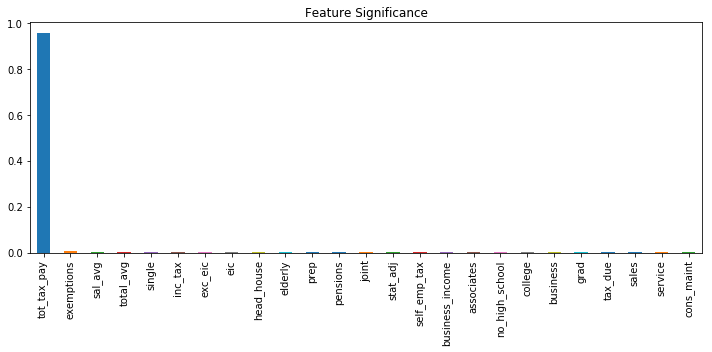

In [57]:
coef1 = pd.Series(rf1.feature_importances_, index = X_1.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef1.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

# AGI Class 2

In [82]:
rf2 = RandomForestRegressor(n_estimators = 100,n_jobs=-1, random_state=9)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2,test_size = 0.3, random_state=52)

rf2.fit(X_2_train, y_2_train.values.ravel())

print(rf2.score(X_2_train, y_2_train))
rf2.score(X_2_test, y_2_test)

0.9599113169802129


0.6424958787480024

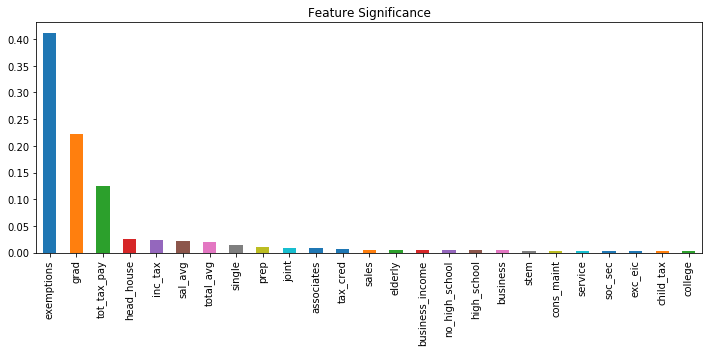

In [59]:
coef2 = pd.Series(rf2.feature_importances_, index = X_2.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef2.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

# AGI 3

In [83]:
rf3 = RandomForestRegressor(n_estimators = 100,n_jobs=-1, random_state=52)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3,test_size = 0.3, random_state=50)

rf3.fit(X_3_train, y_3_train.values.ravel())

print(rf3.score(X_3_train, y_3_train))
print(rf3.score(X_3_test, y_3_test))

0.924345815901139
0.037232703295495106


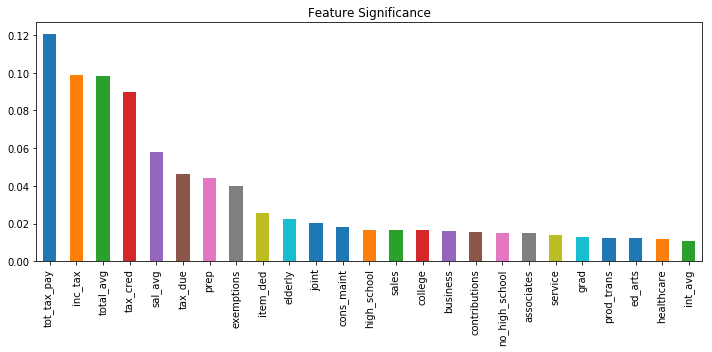

In [61]:
coef3 = pd.Series(rf3.feature_importances_, index = X_3.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef3.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

### AGI 4

In [84]:
rf4 = RandomForestRegressor(n_estimators = 100,n_jobs=-1, random_state=9)
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4,test_size = 0.3, random_state=52)

rf4.fit(X_4_train, y_4_train.values.ravel())

print(rf4.score(X_4_train, y_4_train))
print(rf4.score(X_4_test, y_4_test))

0.8984353169789331
-1.9521032612040994


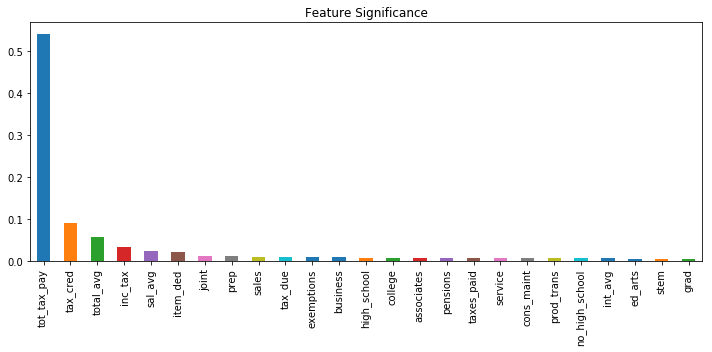

In [63]:
coef4 = pd.Series(rf4.feature_importances_, index = X_4.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef4.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

### AGI 5

In [85]:
rf5 = RandomForestRegressor(n_estimators = 100,n_jobs=-1, random_state=9)
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5,test_size = 0.3, random_state=52)

rf5.fit(X_5_train, y_5_train.values.ravel())

print(rf5.score(X_5_train, y_5_train))
print(rf5.score(X_5_test, y_5_test))

0.9027109643168267
0.014493626219532207


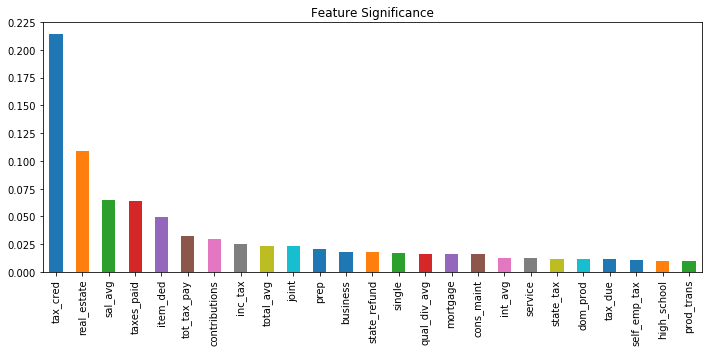

In [65]:
coef5 = pd.Series(rf5.feature_importances_, index = X_5.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef5.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

### AGI 6

In [86]:
rf6 = RandomForestRegressor(n_estimators = 100,n_jobs=-1, random_state=9)
X_6_train, X_6_test, y_6_train, y_6_test = train_test_split(X_6, y_6,test_size = 0.3, random_state=52)

rf6.fit(X_6_train, y_6_train.values.ravel())

print(rf6.score(X_6_train, y_6_train))
print(rf6.score(X_6_test, y_6_test))

0.9727761644911054
0.7301019659887205


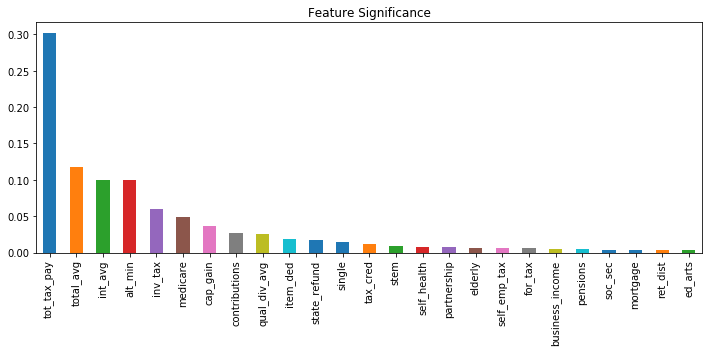

In [52]:
coef6 = pd.Series(rf6.feature_importances_, index = X_6.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef6.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

# Compare AGI Group to Education

In [40]:
#create column for total population in zipcode
pop_col = df_merged.groupby('zipcode').N1.sum().reset_index(name='total_pop')
df_merged = pd.merge(df_merged, pop_col, on=['zipcode'])

In [41]:
#create column for percentage of people in the zipcode in each AGI class 
df_merged['agi_percent'] = df_merged['N1']/df_merged['total_pop']

In [42]:
#new dataframe for Edu vs AGI class
ed_agi = df_merged.copy()

#drop unnecessary columns
ed_agi.drop(['STATEFIPS','STATE'],axis=1,inplace=True)
ed_agi.drop(ed_agi.loc[:,'mars1':'A11902'],axis=1,inplace=True)

#convert agi_stub to numeric
ed_agi['agi_stub'] = pd.to_numeric(ed_agi['agi_stub'],errors='coerce')
ed_agi.head()

,zipcode,agi_stub,N1,refund,single,joint,head_house,prep,exemptions,vita,...,stem,ed_arts,legal,healthcare,service,sales,cons_maint,prod_trans,total_pop,agi_percent
0,35004,1,1490,2.164341,0.651007,0.154362,0.187919,0.469799,1.449664,0.020134,...,0.040009,0.092902,0.00859,0.053797,0.110986,0.339738,0.067586,0.11302,5110,0.291585
1,35004,2,1350,2.597345,0.466667,0.266667,0.222222,0.451852,1.881481,0.014815,...,0.040009,0.092902,0.00859,0.053797,0.110986,0.339738,0.067586,0.11302,5110,0.264188
2,35004,3,970,2.707895,0.319588,0.505155,0.144330,0.463918,2.226804,0.000000,...,0.040009,0.092902,0.00859,0.053797,0.110986,0.339738,0.067586,0.11302,5110,0.189824
3,35004,4,620,3.021739,0.177419,0.758065,0.048387,0.483871,2.596774,0.000000,...,0.040009,0.092902,0.00859,0.053797,0.110986,0.339738,0.067586,0.11302,5110,0.121331
4,35004,5,620,4.168293,0.064516,0.903226,0.032258,0.516129,2.854839,0.000000,...,0.040009,0.092902,0.00859,0.053797,0.110986,0.339738,0.067586,0.11302,5110,0.121331


In [43]:
#Create new column 'higher ed' that combines college and grad degrees
ed_agi['higher_ed'] = ed_agi['college'] + ed_agi['grad']

In [40]:
#total population in each AGI class
ed_agi.groupby('agi_stub').N1.sum()

agi_stub
1    54975440
2    35223570
3    20193350
4    13105200
5    19033490
6     7005170
Name: N1, dtype: int64

AGI Percentage vs. Higher Education for each AGI Group


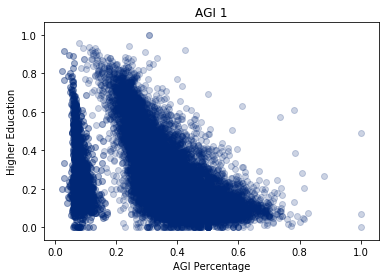

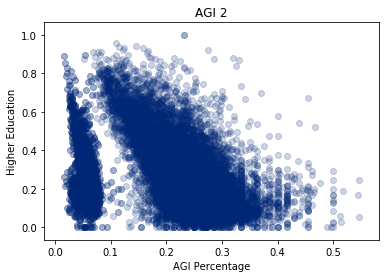

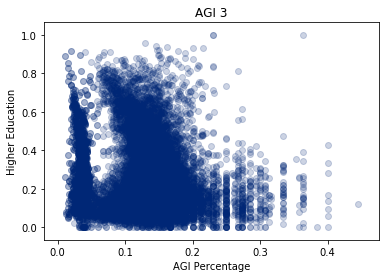

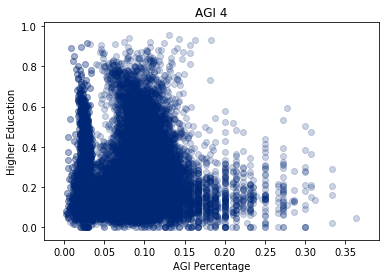

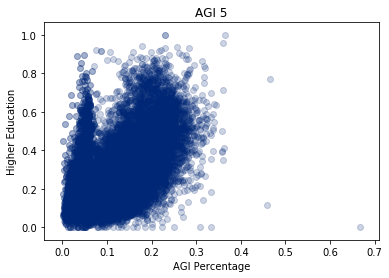

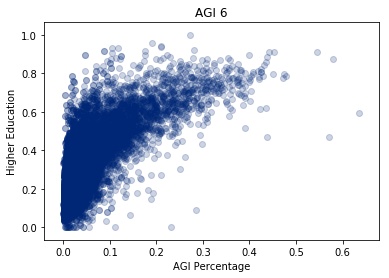

In [79]:
#graph AGI percentage vs Higher Education for each AGI group
print ('AGI Percentage vs. Higher Education for each AGI Group')
for agi in range(1,7):
    plt.scatter(x='agi_percent',y='higher_ed',data=ed_agi[ed_agi['agi_stub']==agi],alpha=.2,color = "#002776")
    plt.title('AGI %s' %agi)
    plt.xlabel('AGI Percentage')
    plt.ylabel('Higher Education')
    plt.show()

## Predict AGI Percentage

In [41]:
#create X and y data sets to predict AGI percentage
y_agi = df_merged['agi_percent']
X_agi = ed_agi.drop(['total_pop','agi_percent','agi_stub','agi_avg'],axis=1)

In [42]:
#train test split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_agi,y_agi,test_size=0.3)

In [66]:
#instantiate and fit Random Forest Regressor 
rf_agi = RandomForestRegressor(n_estimators = 100,n_jobs=-1, random_state=9)

rf_agi.fit(Xa_train,ya_train)

print(rf_agi.score(Xa_train,ya_train))
print(rf_agi.score(Xa_test,ya_test))

0.9893640861410034
0.9265330359371541


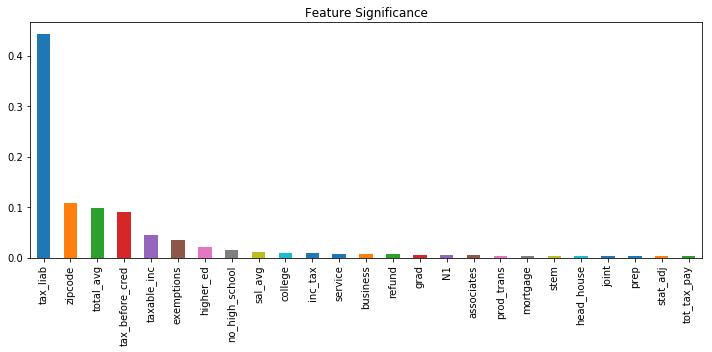

In [67]:
#feature importance
coefa = pd.Series(rf_agi.feature_importances_, index = Xa_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coefa.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

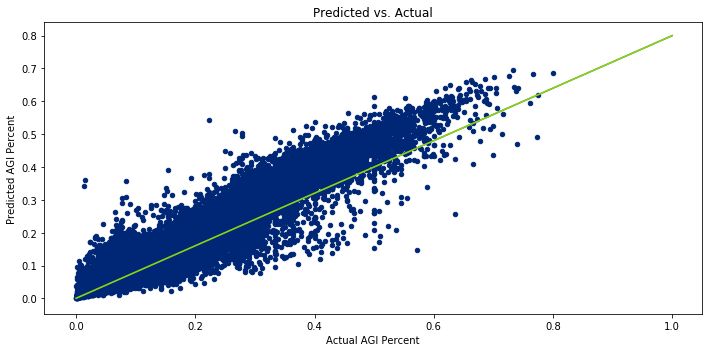

In [78]:
#predicted vs actual graph
plt.figure(figsize=(10, 5))
y_pred = rf_agi.predict(Xa_test)
plt.scatter(ya_test, y_pred, s=20,color = "#002776")
plt.title('Predicted vs. Actual')
plt.xlabel('Actual AGI Percent')
plt.ylabel('Predicted AGI Percent')

plt.plot([min(ya_test), max(ya_test)])
plt.plot([min(ya_test), max(ya_test)], color = "#92d400")
plt.tight_layout()

## Predict Higher Education Percentage

In [43]:
#create X and y data sets to predict Higher Education Percentage
y_ed = ed_agi['higher_ed']
X_ed = ed_agi.drop(['higher_ed', 'college', 'grad','high_school','no_high_school','associates'],axis=1)

In [44]:
#train test split
Xe_train, Xe_test, ye_train, ye_test = train_test_split(X_ed,y_ed,test_size=0.3)

In [62]:
#instantiate and fit random forest regressor
rf_ed = RandomForestRegressor(n_estimators = 100,n_jobs=-1, random_state=9)

rf_ed.fit(Xe_train,ye_train)

print(rf_ed.score(Xe_train,ye_train))
print(rf_ed.score(Xe_test,ye_test))

0.9332810358964155
0.7818509314814769


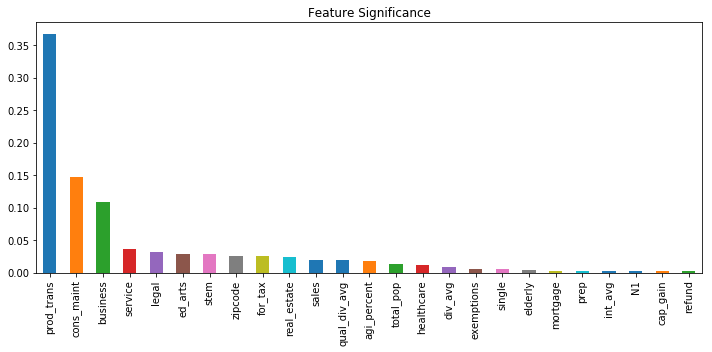

In [63]:
#feature importance
coefe = pd.Series(rf_ed.feature_importances_, index = Xe_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coefe.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

## Explore Tax Credits from 2012-2015

In [44]:
#Read in 2012-2014 data
df2012 = pd.read_csv('2012_zip.csv')
df2013 = pd.read_csv('2013_zip.csv')
df2014 = pd.read_csv('2014_zip.csv')

print(df2012.shape)
print(df2013.shape)
print(df2014.shape)
print(data.shape)

(166904, 77)
(166740, 114)
(166722, 127)
(151026, 132)


In [45]:
#create new columns with the year of the data
df2012['year'] = 2012
df2013['year'] = 2013
df2014['year'] = 2014
data['year'] = 2015

In [46]:
#find columns present in 2015 that are not present in 2012
columns_to_drop = data.columns.difference(df2012.columns)
print(columns_to_drop)

Index(['A00700', 'A02650', 'A02900', 'A03150', 'A03210', 'A03220', 'A03230',
       'A03240', 'A03270', 'A05780', 'A05800', 'A07230', 'A07240', 'A07300',
       'A09400', 'A09750', 'A10600', 'A10960', 'A11560', 'A26270', 'A85300',
       'A85530', 'A85770', 'A85775', 'ELDERLY', 'N00700', 'N02650', 'N02900',
       'N03150', 'N03210', 'N03220', 'N03230', 'N03240', 'N03270', 'N05780',
       'N05800', 'N07230', 'N07240', 'N07300', 'N09400', 'N09750', 'N10600',
       'N10960', 'N11560', 'N26270', 'N85300', 'N85530', 'N85770', 'N85775',
       'RAC', 'RAL', 'TCE', 'TOTAL_VITA', 'VITA', 'VITA_EIC', 'agi_stub',
       'mars1', 'refund'],
      dtype='object')


In [47]:
#append data
df_years = df2014.append(data)
df_years = df_years.append(df2013)
df_years = df2012.append(df_years)
df_years.head()

,A00100,A00101,A00200,A00300,A00600,A00650,A00700,A00900,A01000,A01400,...,STATEFIPS,TCE,TOTAL_VITA,VITA,VITA_EIC,agi_stub,mars1,refund,year,zipcode
0,11517112.0,968541.0,9014595.0,101108.0,92178.0,59907.0,NaN,873349.0,-3916.0,221795.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,0
1,17617800.0,4897366.0,14482697.0,101203.0,101793.0,68476.0,NaN,277466.0,21881.0,314019.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,0
2,15644666.0,6984334.0,12162751.0,102766.0,121653.0,83798.0,NaN,254111.0,47365.0,337870.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,0
3,13885434.0,8013199.0,10672137.0,86313.0,121760.0,85696.0,NaN,220398.0,68217.0,349235.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,0
4,24641055.0,19402193.0,18463065.0,171544.0,307598.0,230806.0,NaN,560330.0,296534.0,712101.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,0


In [48]:
#drop columns for which we do not have data in 2012
df_years.drop(columns_to_drop,axis=1,inplace=True)
other_col_to_drop = df_years.columns.difference(df2012.columns)
df_years.drop(other_col_to_drop,axis=1,inplace=True)
df_years.shape

(651392, 78)

In [49]:
#find rows where the number of returns is 0 and drop these rows
df_years[df_years['N1']==0].count()
df_years.drop(df_years[df_years.N1 == 0].index, inplace=True)
print(df_years.shape)

(512807, 78)


In [50]:
#create new data frame grouped by year
year = df_years.groupby([(df_years.year)]).sum()

### Tax Credit Graphs

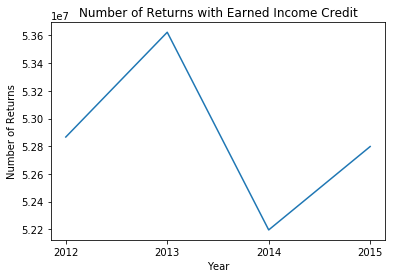

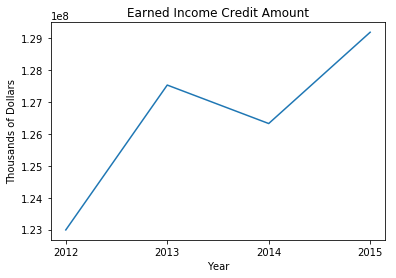

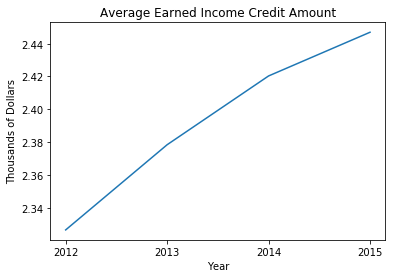

In [100]:
#EIC graphs
plt.plot(year.index,year.N59660)
plt.title('Returns with Earned Income Credit')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,year.A59660)
plt.title('Total Earned Income Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,(year.A59660/year.N59660))
plt.title('Average Earned Income Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

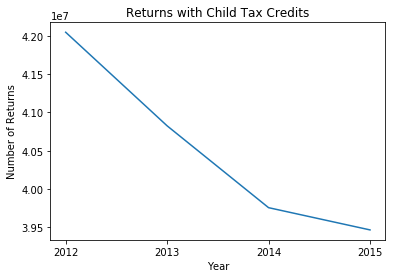

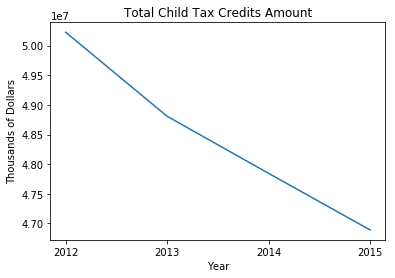

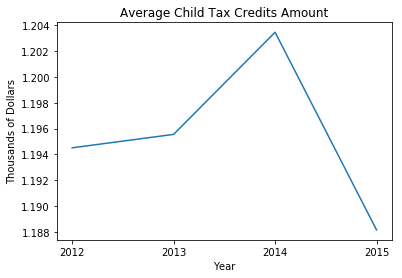

In [101]:
#Child Tax Credit Graphs
plt.plot(year.index,year.N07220)
plt.title('Returns with Child Tax Credits')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,year.A07220)
plt.title('Total Child Tax Credits Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,(year.A07220/year.N07220))
plt.title('Average Child Tax Credits Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

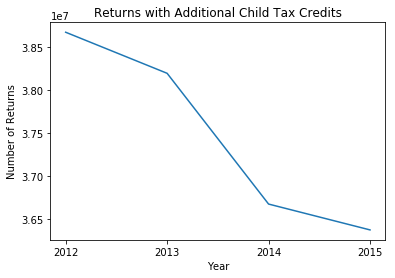

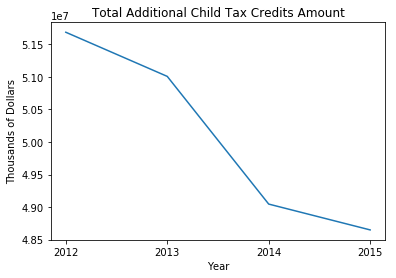

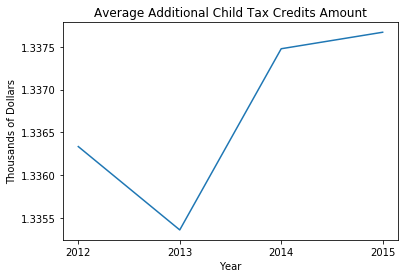

In [102]:
#Additional child tax credit graphs
plt.plot(year.index,year.N11070)
plt.title('Returns with Additional Child Tax Credits')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,year.A11070)
plt.title('Total Additional Child Tax Credits Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,(year.A11070/year.N11070))
plt.title('Average Additional Child Tax Credits Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

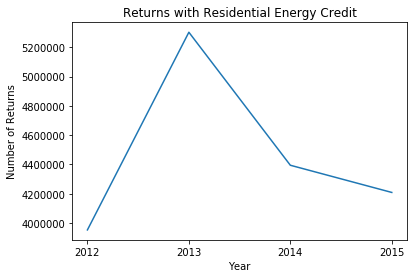

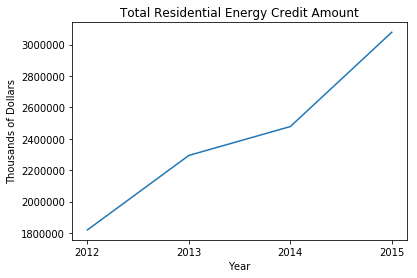

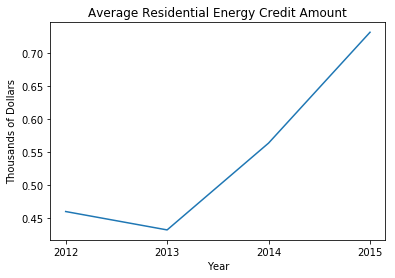

In [103]:
#Residential Energy Credit Graphs
plt.plot(year.index,year.N07260)
plt.title('Returns with Residential Energy Credit')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,year.A07260)
plt.title('Total Residential Energy Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,(year.A07260/year.N07260))
plt.title('Average Residential Energy Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

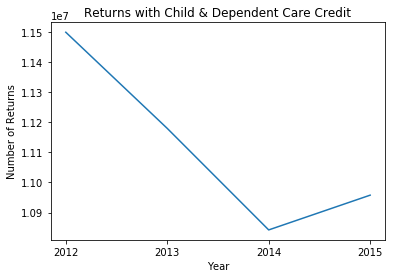

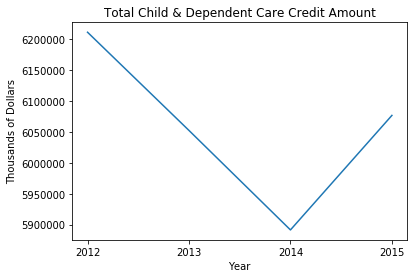

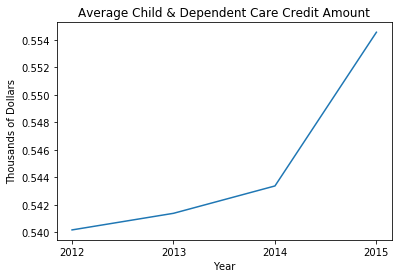

In [104]:
#Child & Dependent Care Credit Graphs
plt.plot(year.index,year.N07180)
plt.title('Returns with Child & Dependent Care Credit')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,year.A07180)
plt.title('Total Child & Dependent Care Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,(year.A07180/year.N07180))
plt.title('Average Child & Dependent Care Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

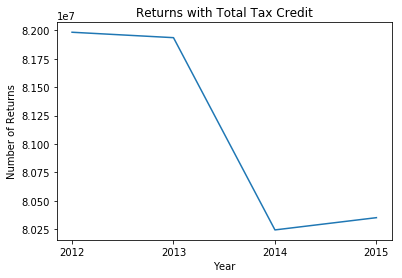

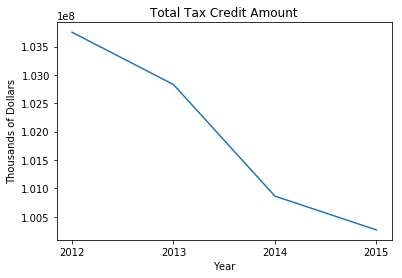

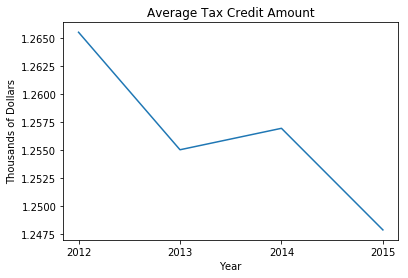

In [105]:
#Total Tax Credit Graphs
plt.plot(year.index,year.N07100)
plt.title('Returns with Total Tax Credit')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,year.A07100)
plt.title('Total Tax Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

plt.plot(year.index,(year.A07100/year.N07100))
plt.title('Average Tax Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2012,2016,1))
plt.show()

In [51]:
#read in the 2006-2011 data
df2006 = pd.read_csv('2006_zip.csv')
df2007 = pd.read_csv('2007_zip.csv')
df2008 = pd.read_csv('2008_zip.csv')
df2009 = pd.read_csv('2009_zip.csv')
df2010 = pd.read_csv('2010_zip.csv')
df2011 = pd.read_csv('2011_zip.csv')

In [53]:
#check shape of the data
print(df2006.shape)
print(df2007.shape)
print(df2008.shape)
print(df2009.shape)
print(df2010.shape)
print(df2011.shape)

(269603, 41)
(232681, 68)
(191283, 38)
(167178, 73)
(167022, 73)
(167334, 73)


In [54]:
#check columns of the data
df2012.columns
df2011.columns
df2010.columns
df2009.columns

Index(['STATEFIPS', 'STATE', 'zipcode', 'agi_stub', 'N1', 'MARS2', 'PREP',
       'N2', 'NUMDEP', 'A00100', 'N00200', 'A00200', 'N00300', 'A00300',
       'N00600', 'A00600', 'N00650', 'A00650', 'N00900', 'A00900', 'SCHF',
       'N01000', 'A01000', 'N01400', 'A01400', 'N01700', 'A01700', 'N02300',
       'A02300', 'N02500', 'A02500', 'N03300', 'A03300', 'N04470', 'A04470',
       'N18425', 'A18425', 'N18450', 'A18450', 'N18500', 'A18500', 'N18300',
       'A18300', 'N19300', 'A19300', 'N19700', 'A19700', 'N04800', 'A04800',
       'N07100', 'A07100', 'N07220', 'A07220', 'N07180', 'A07180', 'N07260',
       'A07260', 'N59660', 'A59660', 'N59720', 'A59720', 'N11070', 'A11070',
       'N09600', 'A09600', 'N06500', 'A06500', 'N10300', 'A10300', 'N11901',
       'A11901', 'N11902', 'A11902'],
      dtype='object')

In [55]:
#rename zipcode column for 2011
df2011 = df2011.rename(columns={'ZIPCODE': 'zipcode'})

In [56]:
#check if the data contains the Residential Energy Credit field
df2009.N07260.head()
df2008.NO7260.head()

AttributeError: 'DataFrame' object has no attribute 'NO7260'

In [57]:
#create new columns with the year of the data
df2011['year'] = 2011
df2010['year'] = 2010
df2009['year'] = 2009

In [58]:
#find columns present in 2015 that are not present in 2009
columns_to_drop1 = df_years.columns.difference(df2009.columns)

In [59]:
#append data
df_years1 = df2011.append(df_years)
df_years1 = df_years1.append(df2010)
df_years1 = df_years1.append(df2009)
print(df_years1.head())
print(df_years1.columns)

       A00100  A00101      A00200    A00300    A00600    A00650    A00900  \
0  12086376.0     NaN   9305221.0  155222.0   99256.0   61464.0  971233.0   
1  17752967.0     NaN  14511884.0  151913.0  114315.0   75968.0  284979.0   
2  15643657.0     NaN  12224133.0  126886.0  128696.0   86101.0  254728.0   
3  13527110.0     NaN  10484202.0  104682.0  108586.0   74674.0  212784.0   
4  22906430.0     NaN  17531050.0  197784.0  258673.0  189009.0  530968.0   

     A01000    A01400     A01700   ...       N59660    N59720    NUMDEP  \
0    1062.0  229997.0  1075986.0   ...     423084.0  395459.0  644217.0   
1   32583.0  318496.0  1717740.0   ...     124157.0  104732.0  402748.0   
2   31360.0  339813.0  1637159.0   ...          0.0       0.0  192138.0   
3   41544.0  343384.0  1390012.0   ...          0.0       0.0  133604.0   
4  206516.0  656903.0  2082519.0   ...          0.0       0.0  165583.0   

       PREP     SCHF  STATE  STATEFIPS  agi_stub  year  zipcode  
0  547355.0  10236.0

In [60]:
#drop columns for which we do not have data in 2012
df_years1.drop(columns_to_drop1,axis=1,inplace=True)

In [61]:
#create new data frame grouped by year
year1 = df_years1.groupby([(df_years1.year)]).sum()

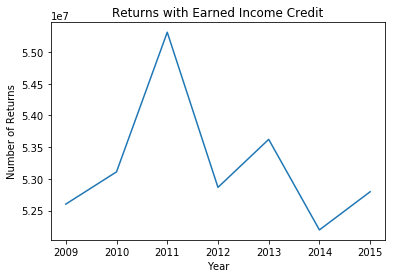

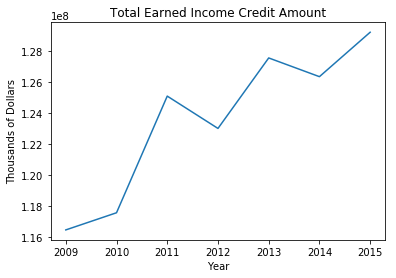

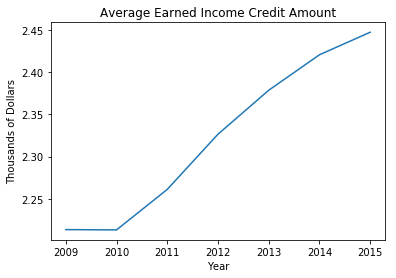

In [62]:
#EIC Graphs
plt.plot(year1.index,year1.N59660)
plt.title('Returns with Earned Income Credit')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,year1.A59660)
plt.title('Total Earned Income Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,(year1.A59660/year1.N59660))
plt.title('Average Earned Income Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

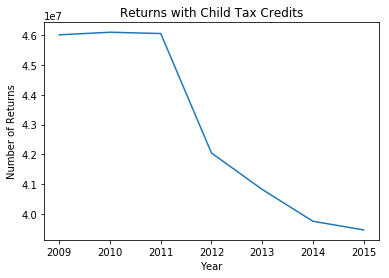

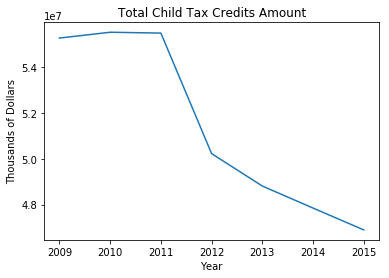

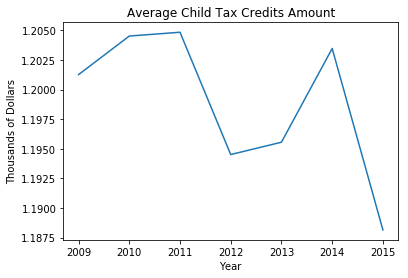

In [63]:
#Child Tax Credit Graphs
plt.plot(year1.index,year1.N07220)
plt.title('Returns with Child Tax Credits')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,year1.A07220)
plt.title('Total Child Tax Credits Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,(year1.A07220/year1.N07220))
plt.title('Average Child Tax Credits Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

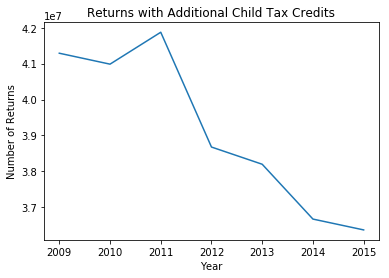

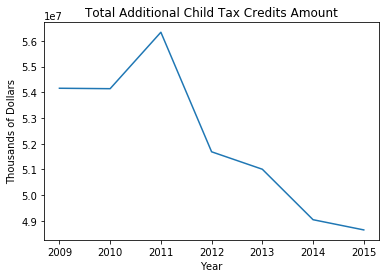

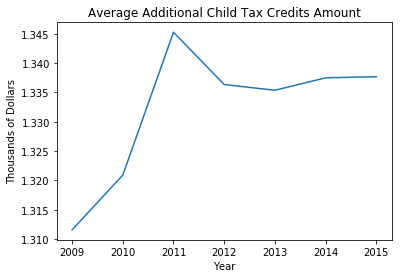

In [64]:
#Additional child tax credit graphs
plt.plot(year1.index,year1.N11070)
plt.title('Returns with Additional Child Tax Credits')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,year1.A11070)
plt.title('Total Additional Child Tax Credits Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,(year1.A11070/year1.N11070))
plt.title('Average Additional Child Tax Credits Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

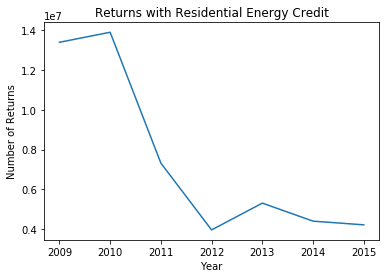

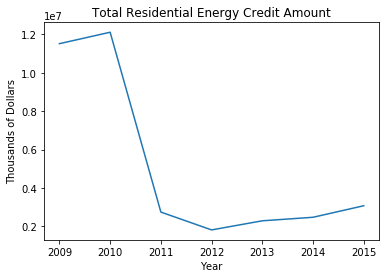

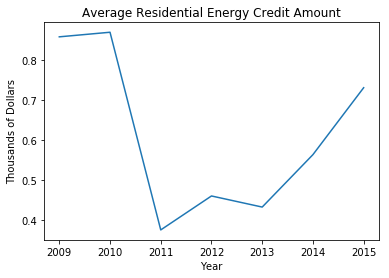

In [65]:
#Residential Energy Credit Graphs
plt.plot(year1.index,year1.N07260)
plt.title('Returns with Residential Energy Credit')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,year1.A07260)
plt.title('Total Residential Energy Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,(year1.A07260/year1.N07260))
plt.title('Average Residential Energy Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

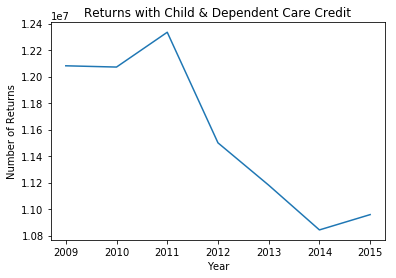

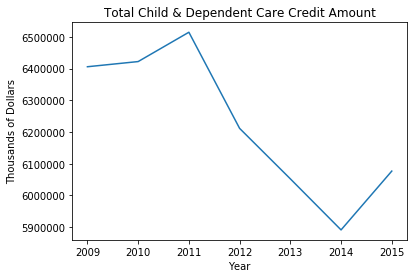

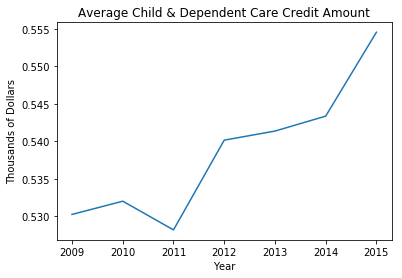

In [66]:
#Child & Dependent Care Credit Graphs
plt.plot(year1.index,year1.N07180)
plt.title('Returns with Child & Dependent Care Credit')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,year1.A07180)
plt.title('Total Child & Dependent Care Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,(year1.A07180/year1.N07180))
plt.title('Average Child & Dependent Care Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

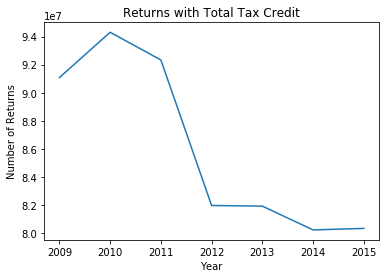

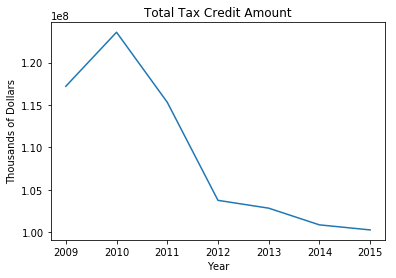

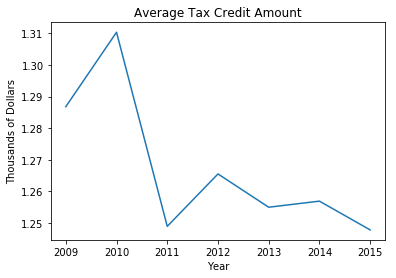

In [67]:
#Total Tax Credit Graphs
plt.plot(year1.index,year1.N07100)
plt.title('Returns with Total Tax Credit')
plt.xlabel('Year')
plt.ylabel('Number of Returns')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,year1.A07100)
plt.title('Total Tax Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()

plt.plot(year1.index,(year1.A07100/year1.N07100))
plt.title('Average Tax Credit Amount')
plt.xlabel('Year')
plt.ylabel('Thousands of Dollars')
plt.xticks(np.arange(2009,2016,1))
plt.show()